<a href="https://colab.research.google.com/github/Farhan-BA/Python-/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/glass.csv')

In [3]:
print(df.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [4]:
class_counts = df['Type'].value_counts().sort_index()
print("Class Distribution:\n", class_counts)

Class Distribution:
 Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64


In [5]:
print("🔍 Missing Values:\n", df.isnull().sum())

🔍 Missing Values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [6]:
print("\n🔍 Data Types:\n", df.dtypes)


🔍 Data Types:
 RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object


In [7]:
duplicates = df.duplicated().sum()

In [8]:
print(f"\n🔍 Number of Duplicate Rows: {duplicates}")


🔍 Number of Duplicate Rows: 1


In [9]:
print("\n📊 Summary Statistics:\n", df.describe())


📊 Summary Statistics:
                RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0

In [10]:
print(f"Original shape: {df.shape}")

Original shape: (214, 10)


In [13]:
removed = df.shape[0] - df_cleaned.shape[0]
print(f"✅ Duplicates removed: {removed}")

✅ Duplicates removed: 1


In [14]:
num_duplicates = duplicates.sum()
print(f"🔁 Number of duplicate rows: {num_duplicates}")

🔁 Number of duplicate rows: 1


In [16]:
df_cleaned = df.drop_duplicates()

In [18]:
duplicates_mask = df.duplicated()
num_duplicates = duplicates_mask.sum()

if num_duplicates > 0:
    print("\n📋 Duplicate rows preview:")
    print(df[duplicates_mask])
else:
    print("✅ No duplicate rows found.")


📋 Duplicate rows preview:
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
39  1.52213  14.21  3.82  0.47  71.77  0.11  9.57  0.0  0.0     1


/tmp/ipython-input-23-762413853.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=df, palette='Set2')


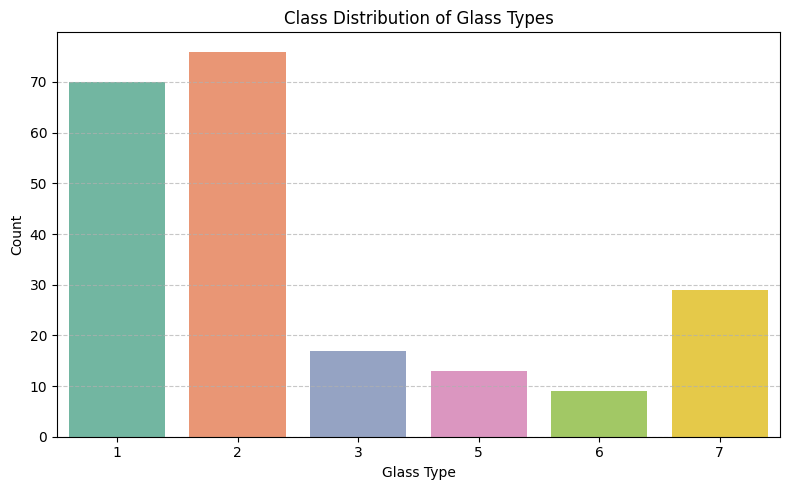

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=df, palette='Set2')
plt.title("Class Distribution of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [24]:
features = df.drop(columns=['Type'])

In [25]:
correlation_matrix = features.corr()

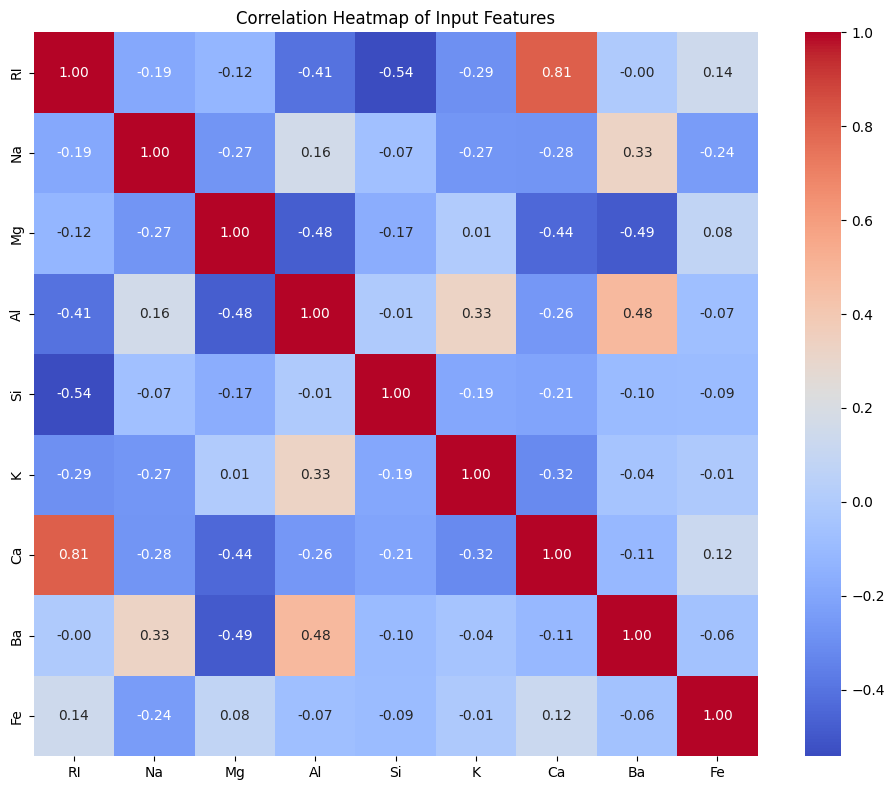

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Heatmap of Input Features")
plt.tight_layout()
plt.show()

In [27]:
X = df.drop(columns=['Type', 'Id'], errors='ignore')
y = df['Type']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = clf.predict(X_test_scaled)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           1       0.69      1.00      0.81        11
           2       0.90      0.64      0.75        14
           3       1.00      0.67      0.80         3
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.84        43
   macro avg       0.91      0.84      0.86        43
weighted avg       0.87      0.84      0.83        43

Confusion Matrix:
 [[11  0  0  0  0  0]
 [ 4  9  0  0  0  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]
Accuracy Score: 0.8372093023255814
